In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression,Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [170]:
df = pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


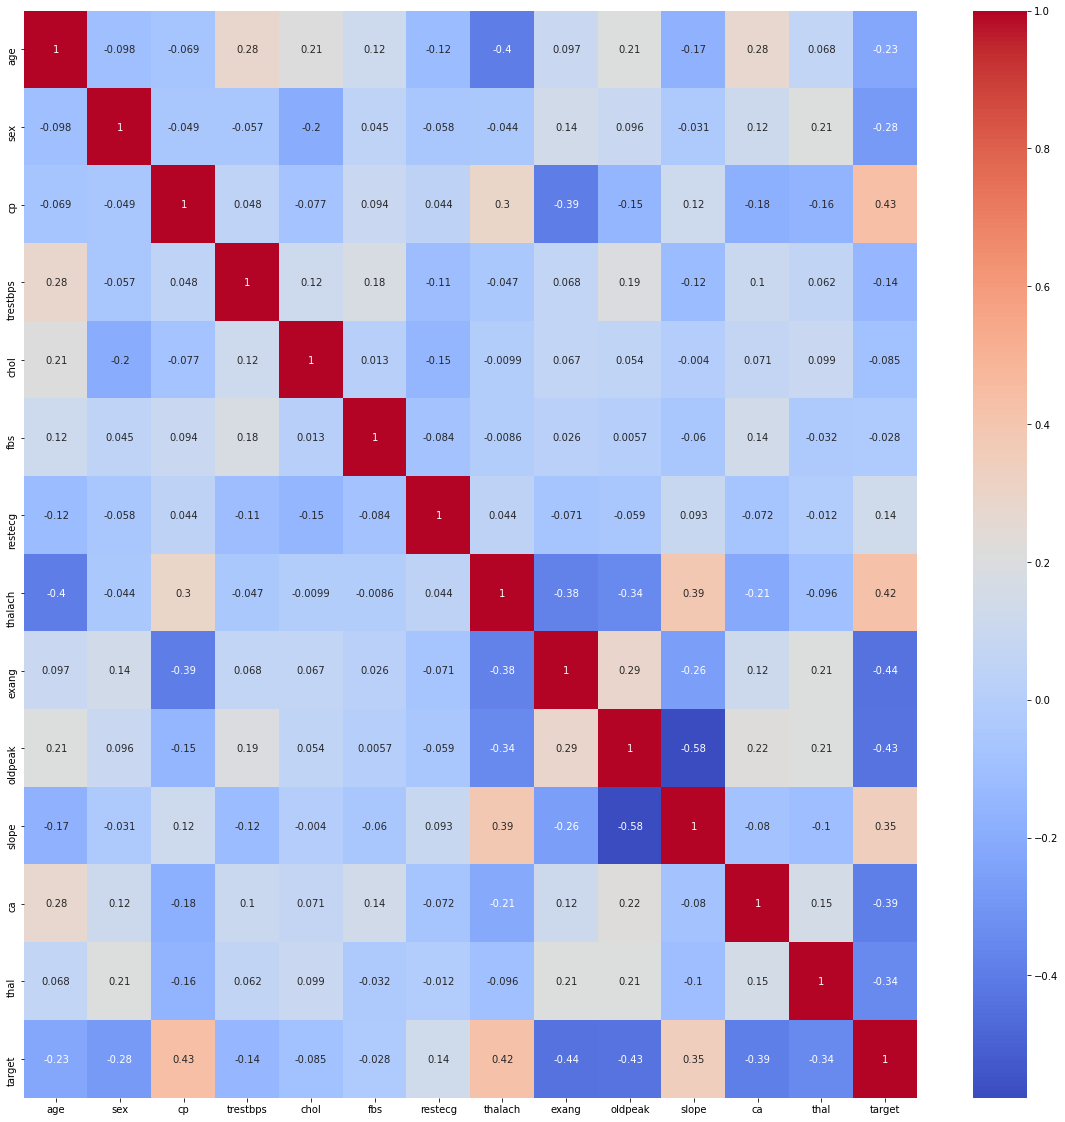

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

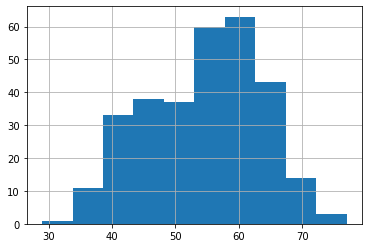

In [11]:
plt.figure(figsize= (6,4))
df['age'].hist()
plt.show()

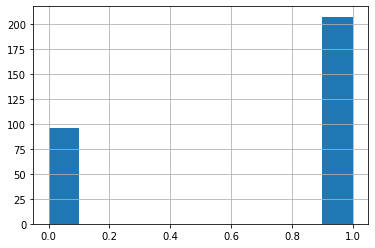

In [12]:
plt.figure(figsize= (6,4))
df['sex'].hist()
plt.show()

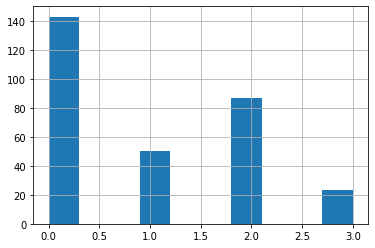

In [13]:
plt.figure(figsize= (6,4))
df['cp'].hist()
plt.show()

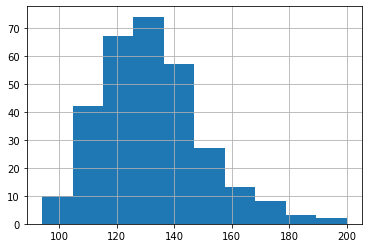

In [14]:
plt.figure(figsize= (6,4))
df['trestbps'].hist()
plt.show()

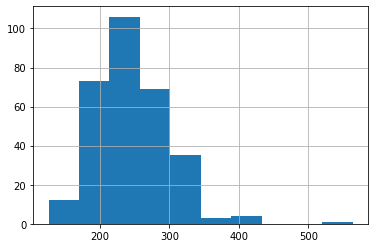

In [15]:
plt.figure(figsize= (6,4))
df['chol'].hist()
plt.show()

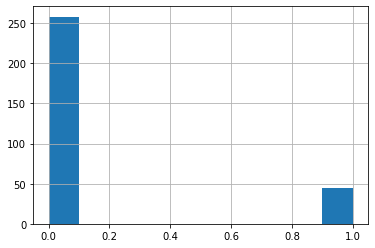

In [16]:
plt.figure(figsize= (6,4))
df['fbs'].hist()
plt.show()

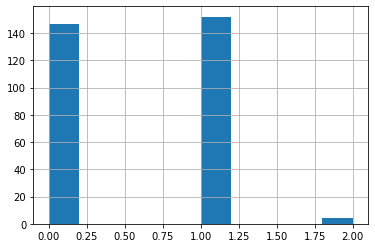

In [17]:
plt.figure(figsize= (6,4))
df['restecg'].hist()
plt.show()

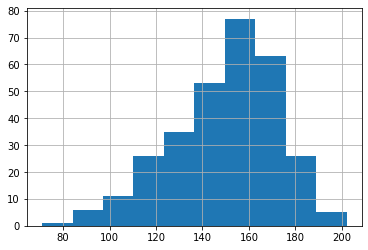

In [18]:
plt.figure(figsize= (6,4))
df['thalach'].hist()
plt.show()

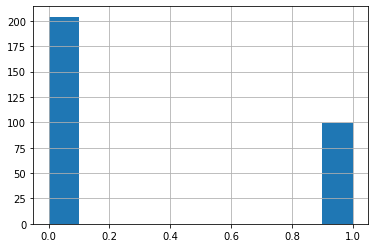

In [19]:
plt.figure(figsize= (6,4))
df['exang'].hist()
plt.show()

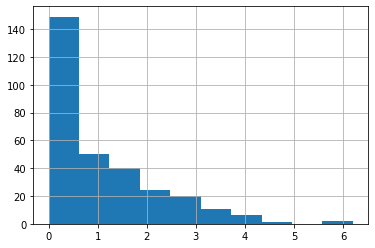

In [20]:
plt.figure(figsize= (6,4))
df['oldpeak'].hist()
plt.show()

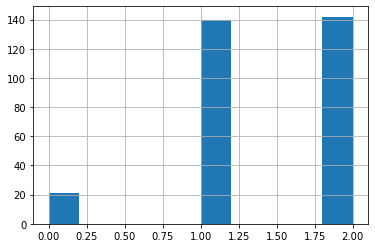

In [21]:
plt.figure(figsize= (6,4))
df['slope'].hist()
plt.show()

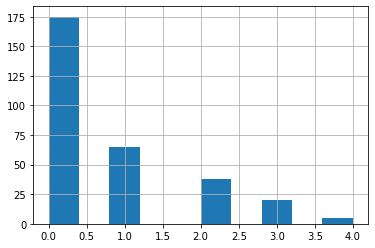

In [22]:
plt.figure(figsize= (6,4))
df['ca'].hist()
plt.show()

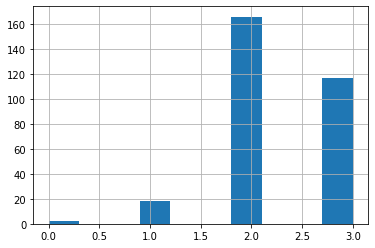

In [23]:
plt.figure(figsize= (6,4))
df['thal'].hist()
plt.show()

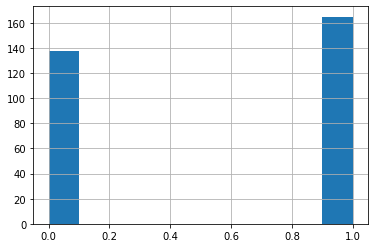

In [24]:
plt.figure(figsize= (6,4))
df['target'].hist()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

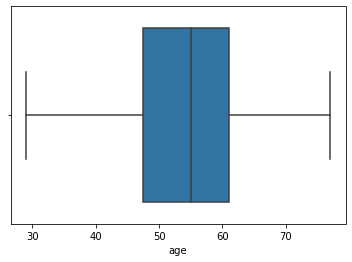

In [25]:
sns.boxplot(df['age'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex'>

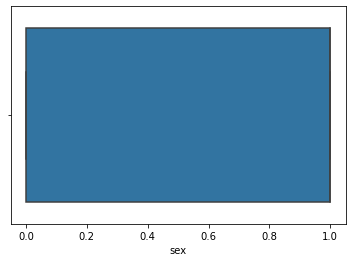

In [26]:
sns.boxplot(df['sex'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp'>

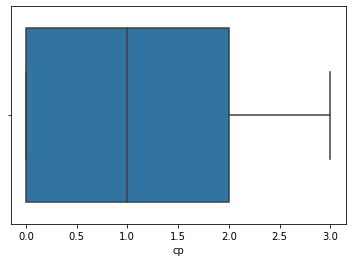

In [27]:
sns.boxplot(df['cp'])

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

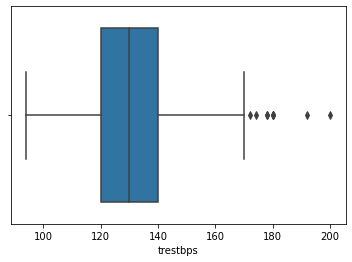

In [29]:
sns.boxplot(df['trestbps'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

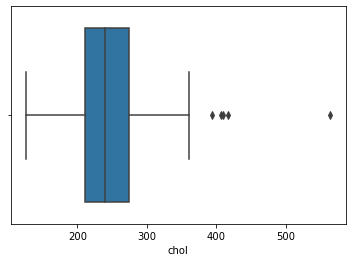

In [30]:
sns.boxplot(df['chol'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs'>

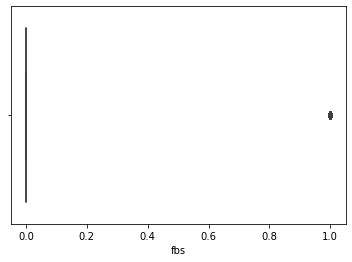

In [31]:
sns.boxplot(df['fbs'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg'>

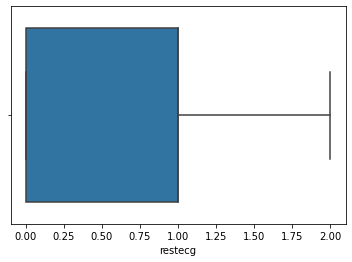

In [32]:
sns.boxplot(df['restecg'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

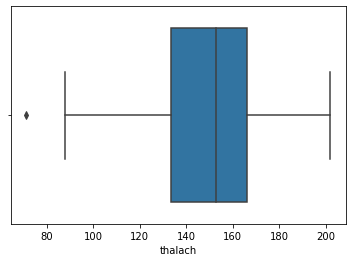

In [33]:
sns.boxplot(df['thalach'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang'>

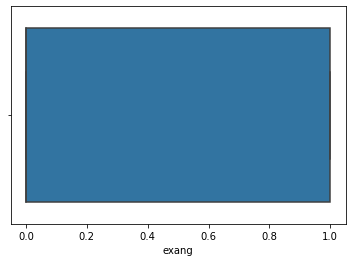

In [34]:
sns.boxplot(df['exang'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

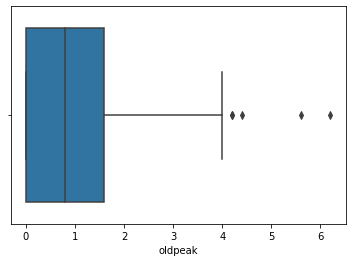

In [35]:
sns.boxplot(df['oldpeak'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope'>

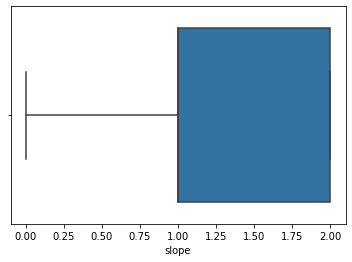

In [36]:
sns.boxplot(df['slope'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca'>

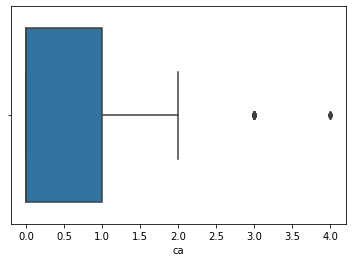

In [37]:
sns.boxplot(df['ca'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal'>

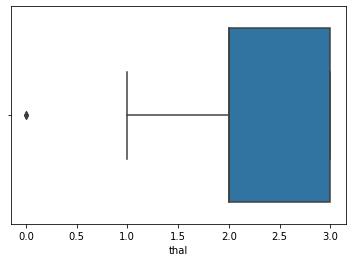

In [38]:
sns.boxplot(df['thal'])

# EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

In [39]:
DESCRIPTION OF FEATURES
Age: age in years
Sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
Trestbps: resting blood pressure (in mm Hg on admission to the hospital)
Chol: serum cholestoral in mg/dl
Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
Restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
Thalach: maximum heart rate achieved
Exang: exercise induced angina (1 = yes; 0 = no)
Oldpeak = ST depression induced by exercise relative to rest
Slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy
Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
Target: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

SyntaxError: invalid syntax (<ipython-input-39-3c2f56c6d740>, line 1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


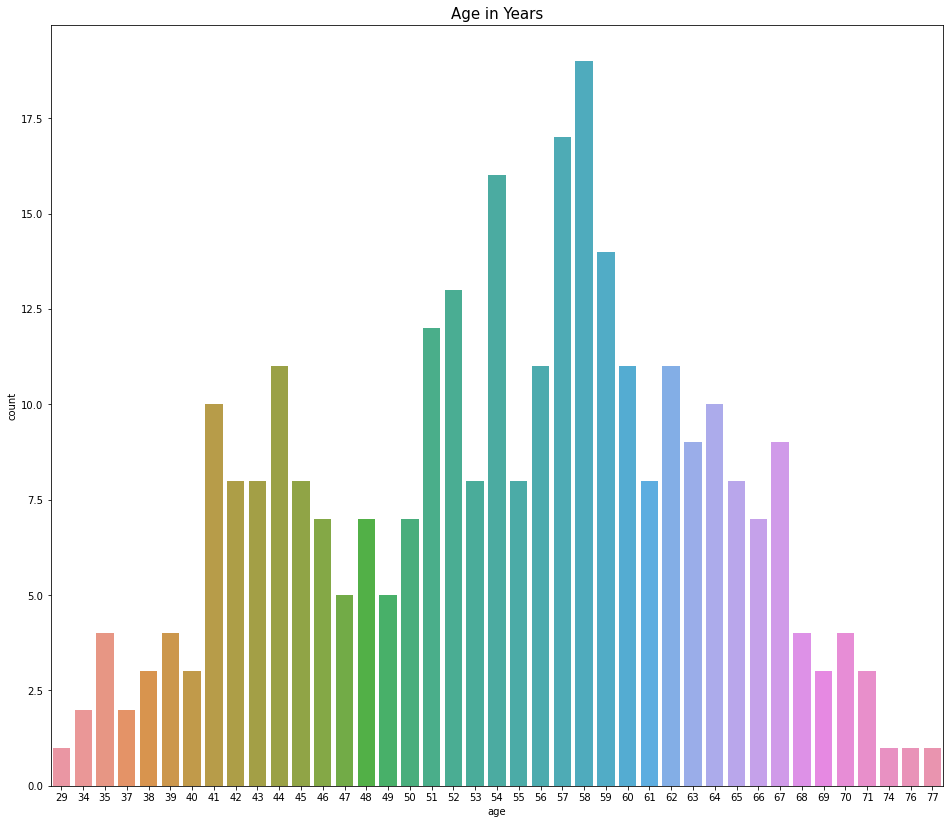

In [40]:
plt.figure(figsize=(16,14))
sns.countplot(df['age'])
plt.title('Age in Years', fontsize = 15)
plt.show()

In [41]:
age_count = pd.DataFrame(df['age'].value_counts(bins=10))
age_count

,age
"(57.8, 62.6]",63
"(53.0, 57.8]",52
"(48.2, 53.0]",45
"(62.6, 67.4]",43
"(43.4, 48.2]",38
"(38.6, 43.4]",33
"(67.4, 72.2]",14
"(33.8, 38.6]",11
"(72.2, 77.0]",3
"(28.951, 33.8]",1


In [ ]:
The ages of the patients diagnosed in this dataset were ranged from 29 t0 77
calculations:
    ages(58-63) = (63/303)*100
    ages(53-57) = (52/303)*100
    ages(29-34) = (1/303)*100
    aged>=53    = ((63+52+43+14+3)/303)*100
20.79% were of ages between 58-63, followed by 53-57 with a percentage of 17.16%
The least in the ranking based on age bracket were those aged between 29-34 with a percentage of 0.0033%
57.8% of the patients were aged 53years and above

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


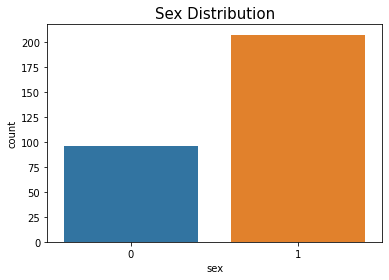

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(df['sex'])
plt.title('Sex Distribution', fontsize = 15)
plt.show()

In [ ]:
Sex: sex (1 = male; 0 = female)

In [43]:
sex_count = pd.DataFrame(df['sex'].value_counts())
sex_count

,sex
1,207
0,96


In [44]:
sex_percent = pd.DataFrame(df['sex'].value_counts(normalize=True)*100)
sex_percent

,sex
1,68.316832
0,31.683168


In [45]:
pd.DataFrame(df.groupby('sex')['target'].value_counts())

target
sex target        
0   1           72
    0           24
1   0          114
    1           93

In [46]:
pd.DataFrame(df.groupby('sex')['target'].value_counts(normalize=True)*100)

target
sex target           
0   1       75.000000
    0       25.000000
1   0       55.072464
    1       44.927536

In [ ]:
63.32% of the patients diagnosed were males while 31.68% were females
75% of the females had heart disease

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


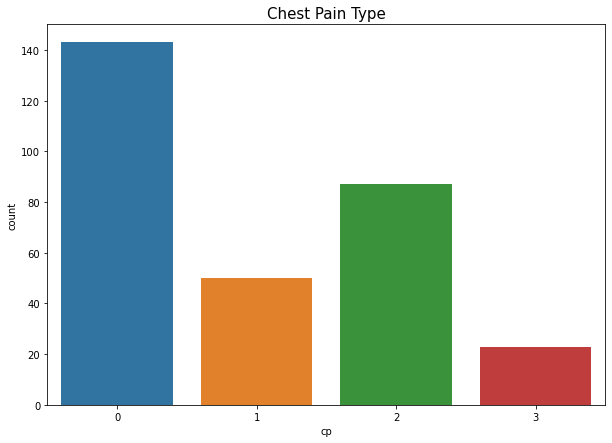

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(df['cp'])
plt.title('Chest Pain Type', fontsize = 15)
plt.show()

In [ ]:
cp: Chest Pain Type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic

In [48]:
cp_count = pd.DataFrame(df['cp'].value_counts())
cp_count

,cp
0,143
2,87
1,50
3,23


In [49]:
cp_percent = pd.DataFrame(df['cp'].value_counts(normalize=True)*100)
cp_percent

,cp
0,47.194719
2,28.712871
1,16.501650
3,7.590759


In [50]:
pd.DataFrame(df.groupby('cp')['sex'].value_counts())

sex
cp sex     
0  1    104
   0     39
1  1     32
   0     18
2  1     52
   0     35
3  1     19
   0      4

In [51]:
pd.DataFrame(df.groupby('cp')['sex'].value_counts(normalize=True)*100)

sex
cp sex           
0  1    72.727273
   0    27.272727
1  1    64.000000
   0    36.000000
2  1    59.770115
   0    40.229885
3  1    82.608696
   0    17.391304

In [52]:
pd.DataFrame(df.groupby('cp')['exang'].value_counts())

exang
cp exang       
0  1         80
   0         63
1  0         46
   1          4
2  0         76
   1         11
3  0         19
   1          4

In [53]:
pd.DataFrame(df.groupby('cp')['exang'].value_counts(normalize=True)*100)

exang
cp exang           
0  1      55.944056
   0      44.055944
1  0      92.000000
   1       8.000000
2  0      87.356322
   1      12.643678
3  0      82.608696
   1      17.391304

In [54]:
pd.DataFrame(df.groupby('cp')['fbs'].value_counts())

fbs
cp fbs     
0  0    125
   1     18
1  0     45
   1      5
2  0     70
   1     17
3  0     18
   1      5

In [55]:
pd.DataFrame(df.groupby('cp')['fbs'].value_counts(normalize=True)*100)

fbs
cp fbs           
0  0    87.412587
   1    12.587413
1  0    90.000000
   1    10.000000
2  0    80.459770
   1    19.540230
3  0    78.260870
   1    21.739130

In [56]:
pd.DataFrame(df.groupby('cp')['target'].value_counts())

target
cp target        
0  0          104
   1           39
1  1           41
   0            9
2  1           69
   0           18
3  1           16
   0            7

In [57]:
pd.DataFrame(df.groupby('cp')['target'].value_counts(normalize=True)*100)

target
cp target           
0  0       72.727273
   1       27.272727
1  1       82.000000
   0       18.000000
2  1       79.310345
   0       20.689655
3  1       69.565217
   0       30.434783

In [ ]:
47.19% of the diagnosed patients had typical angina pain with the sum of 143 persons of which 104(72.73%) were males and females 39(27.27%)
of the 143 patients with angina pain 80(55.94%) of the patients pains were caused from exercise.
87.41% of the patients with typical angina had a fasting blood sugar of above 120mg/dl concentration.
28.71% had atypical angina pain
16.50% had non-anginal pain
while 7.59% were asymtomatic
Atypical angina pain and non-anginal pain has accounted for more of heart disease 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


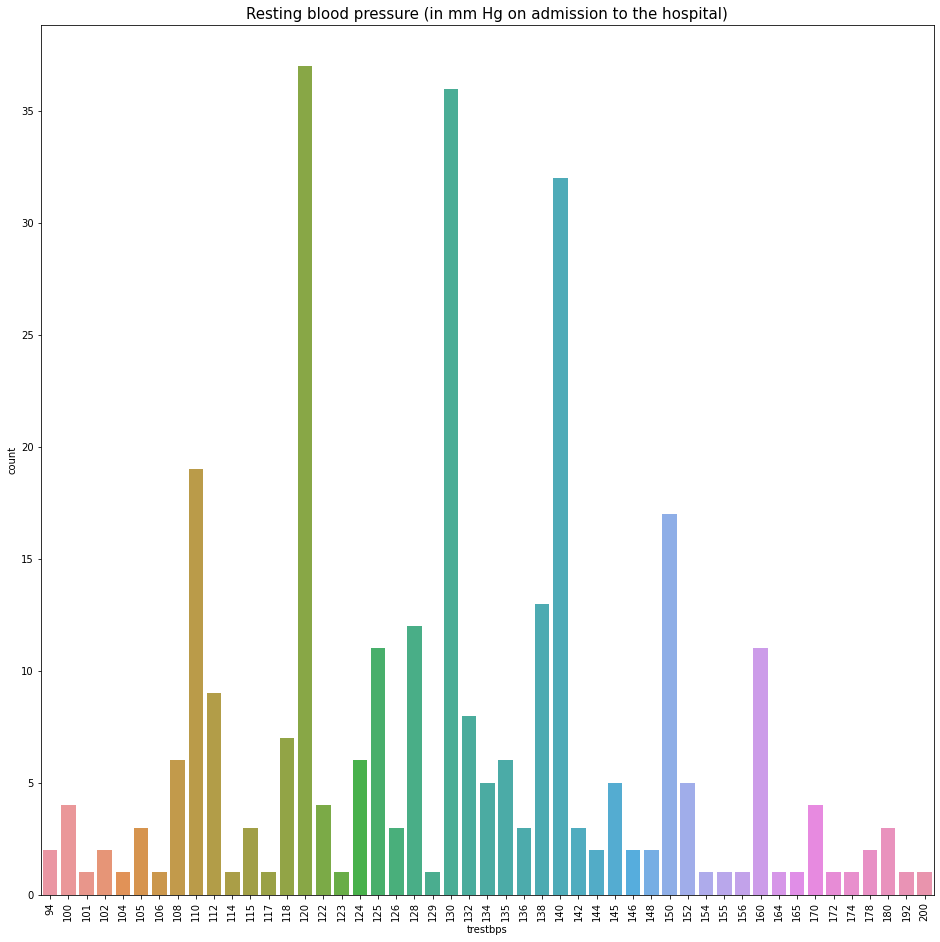

In [58]:
plt.figure(figsize=(16,16))
sns.countplot(df['trestbps'])
plt.title('Resting blood pressure (in mm Hg on admission to the hospital)', fontsize = 15)
plt.xticks(rotation= 90)
plt.show()

In [ ]:
Trestbps: resting blood pressure (in mm Hg on admission to the hospital)

In [59]:
trestbps_count = pd.DataFrame(df['trestbps'].value_counts(bins=10))
trestbps_count

,trestbps
"(125.8, 136.4]",74
"(115.2, 125.8]",67
"(136.4, 147.0]",57
"(104.6, 115.2]",42
"(147.0, 157.6]",27
"(157.6, 168.2]",13
"(93.893, 104.6]",10
"(168.2, 178.8]",8
"(178.8, 189.4]",3
"(189.4, 200.0]",2


In [60]:
trestbps_percent = pd.DataFrame(df['trestbps'].value_counts(normalize=True)*100)
trestbps_percent

,trestbps
120,12.211221
130,11.881188
140,10.561056
110,6.270627
150,5.610561
138,4.290429
128,3.960396
125,3.630363
160,3.630363
112,2.970297


In [ ]:
34.65% of the patients on admission to the hospital had a resting blood pressure of either 120(12.21%),130(11.88%) or 140(10.56%)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


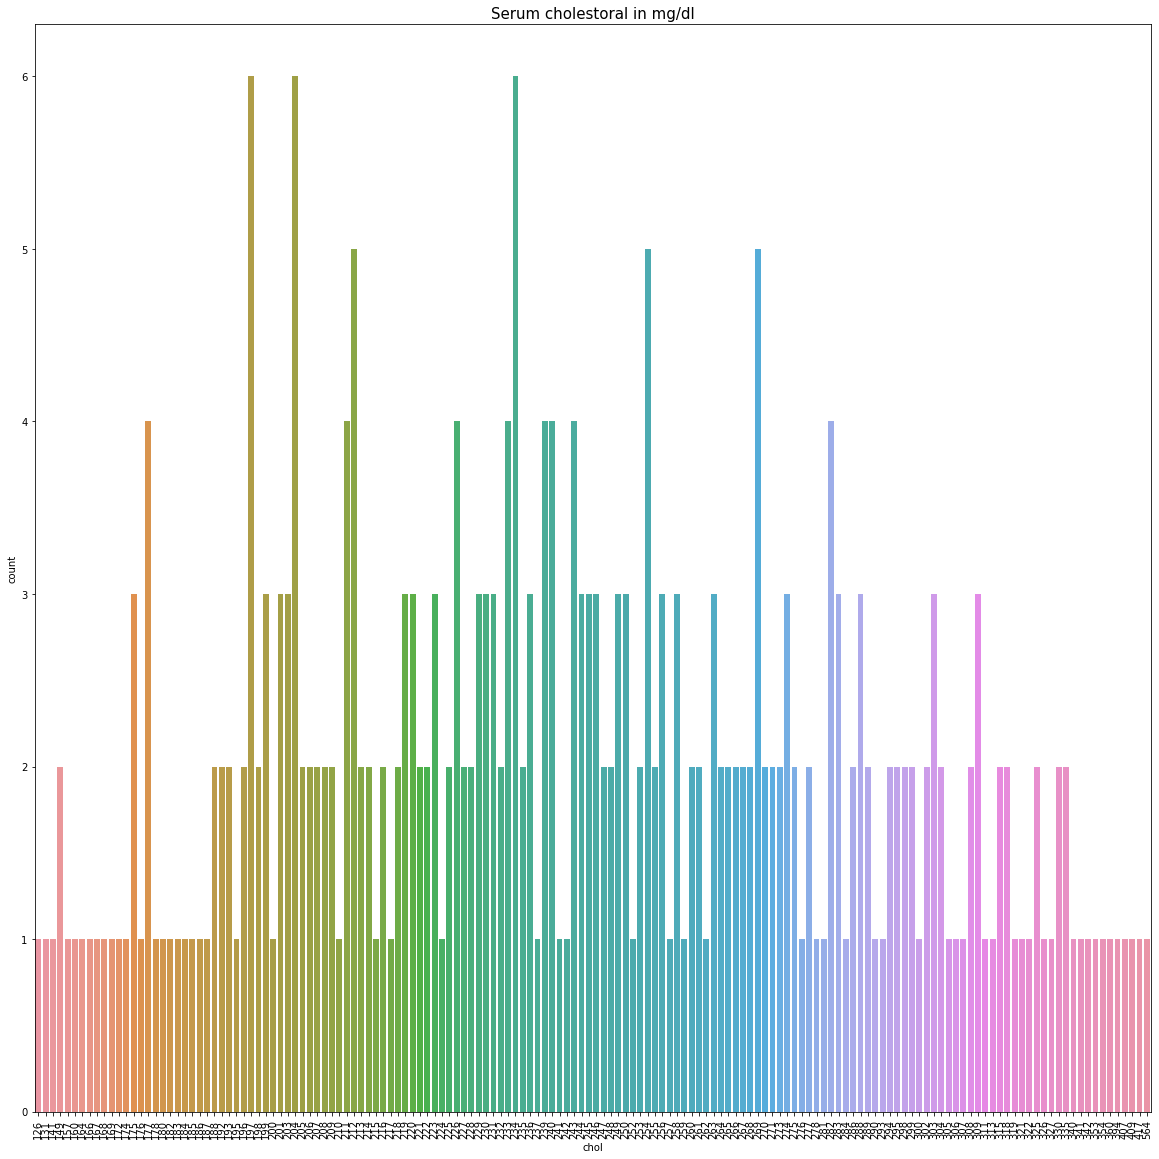

In [61]:
plt.figure(figsize=(20,20))
sns.countplot(df['chol'])
plt.title('Serum cholestoral in mg/dl', fontsize = 15)
plt.xticks(rotation= 90)
plt.show()

In [ ]:
Chol: serum cholestoral in mg/dl

In [62]:
chol_count = pd.DataFrame(df['chol'].value_counts(bins=8))
chol_count

,chol
"(180.75, 235.5]",116
"(235.5, 290.25]",110
"(290.25, 345.0]",45
"(125.56099999999999, 180.75]",24
"(345.0, 399.75]",4
"(399.75, 454.5]",3
"(509.25, 564.0]",1
"(454.5, 509.25]",0


In [63]:
chol_percent = pd.DataFrame(df['chol'].value_counts(normalize=True)*100)
chol_percent

,chol
204,1.980198
197,1.980198
234,1.980198
269,1.650165
212,1.650165
...,...
215,0.330033
210,0.330033
200,0.330033
195,0.330033


In [ ]:
74.59% of the diagnosed patients had serum cholesterol concentration of 180-290mg/dl
The minimum concentration recorded was 126mg/dl while 564mg/dl was the maximum concentration

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


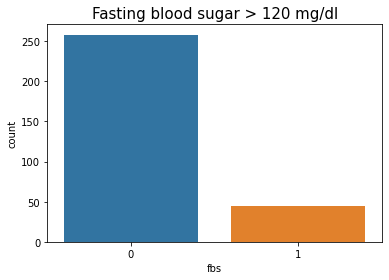

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(df['fbs'])
plt.title('Fasting blood sugar > 120 mg/dl', fontsize = 15)
plt.xticks(rotation= 0)
plt.show()

In [ ]:
Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

In [65]:
fbs_count = pd.DataFrame(df['fbs'].value_counts())
fbs_count

,fbs
0,258
1,45


In [66]:
fbs_percent = pd.DataFrame(df['fbs'].value_counts(normalize=True)*100)
fbs_percent

,fbs
0,85.148515
1,14.851485


In [67]:
pd.DataFrame(df.groupby('fbs')['sex'].value_counts())

sex
fbs sex     
0   1    174
    0     84
1   1     33
    0     12

In [68]:
pd.DataFrame(df.groupby('fbs')['sex'].value_counts(normalize=True)*100)

sex
fbs sex           
0   1    67.441860
    0    32.558140
1   1    73.333333
    0    26.666667

In [ ]:
85.15% of the patients had above 120mg/dl Fasting Blood Sugar(FBS) level while 14.85% had FBS value less than 120mg/dl
67.44% of the patients with above 120mg/dl FBS value were males while 32.56% were females

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


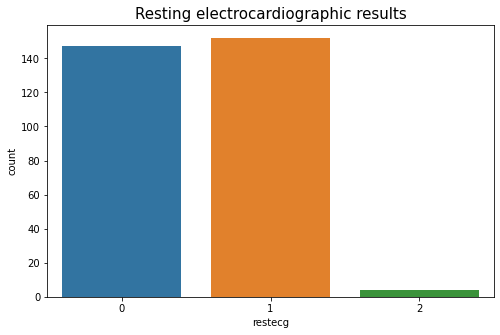

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(df['restecg'])
plt.title('Resting electrocardiographic results', fontsize = 15)
plt.xticks(rotation= 0)
plt.show()

In [ ]:
Restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [70]:
restecg_count = pd.DataFrame(df['restecg'].value_counts())
restecg_count

,restecg
1,152
0,147
2,4


In [71]:
restecg_percent = pd.DataFrame(df['restecg'].value_counts(normalize=True)*100)
restecg_percent

,restecg
1,50.165017
0,48.514851
2,1.320132


In [72]:
pd.DataFrame(df.groupby('restecg')['sex'].value_counts())

sex
restecg sex     
0       1    103
        0     44
1       1    103
        0     49
2       0      3
        1      1

In [73]:
pd.DataFrame(df.groupby('restecg')['sex'].value_counts(normalize=True)*100)

sex
restecg sex           
0       1    70.068027
        0    29.931973
1       1    67.763158
        0    32.236842
2       0    75.000000
        1    25.000000

In [74]:
pd.DataFrame(df.groupby('restecg')['fbs'].value_counts())

fbs
restecg fbs     
0       0    121
        1     26
1       0    133
        1     19
2       0      4

In [75]:
pd.DataFrame(df.groupby('restecg')['fbs'].value_counts(normalize=True)*100)

fbs
restecg fbs            
0       0     82.312925
        1     17.687075
1       0     87.500000
        1     12.500000
2       0    100.000000

In [ ]:
50.17% had a normal resting electrocardiographic value while 48.51% had an abnormality with ST-T wave.
67.76% of males had an abnormality with ST-T wave from the resting electrocardiographic result.
87.5% of the patients with abnormality in the resting ecg had above 120mg/dl FBS concentration

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


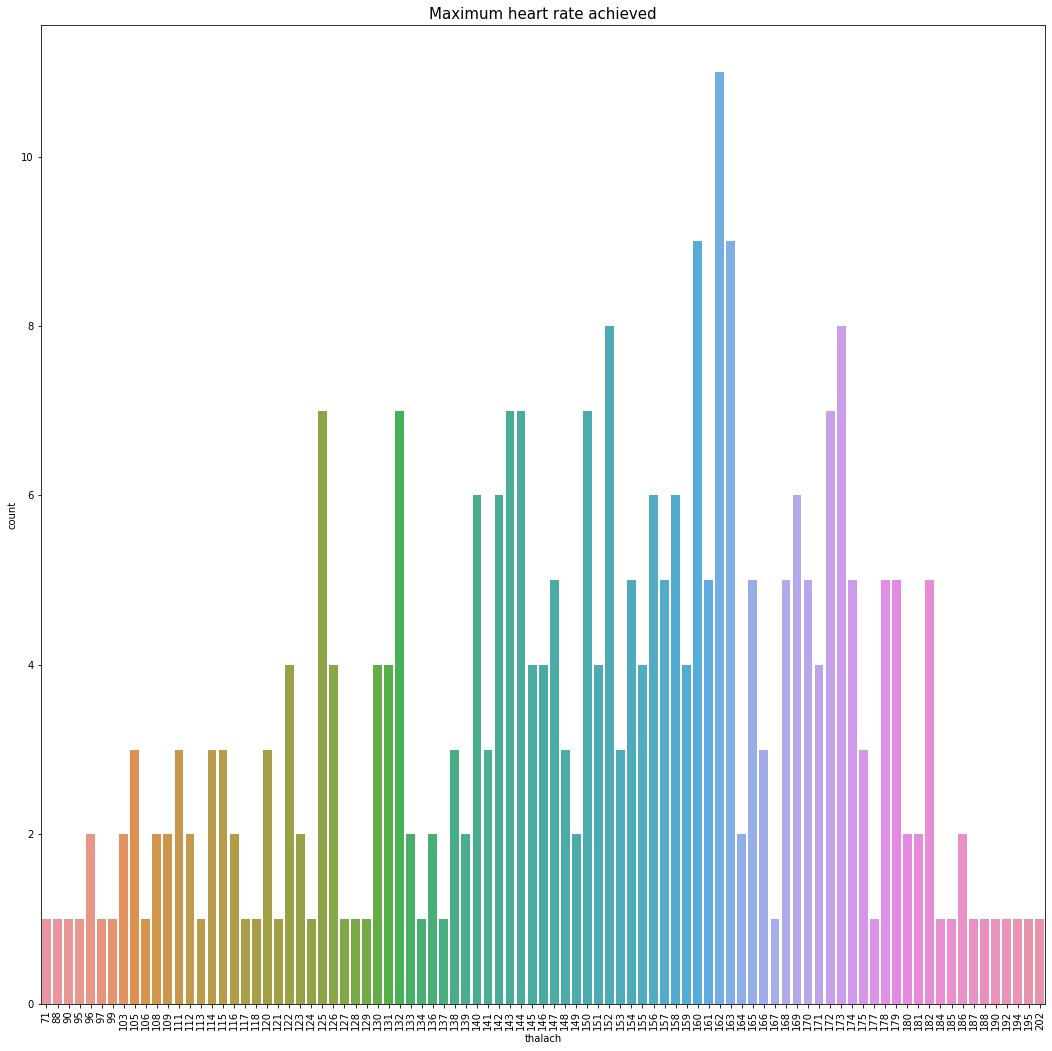

In [76]:
plt.figure(figsize=(18,18))
sns.countplot(df['thalach'])
plt.title('Maximum heart rate achieved', fontsize = 15)
plt.xticks(rotation= 90)
plt.show()

In [ ]:
Thalach: maximum heart rate achieved

In [77]:
thalach_count = pd.DataFrame(df['thalach'].value_counts(bins=10))
thalach_count

,thalach
"(149.6, 162.7]",77
"(162.7, 175.8]",63
"(136.5, 149.6]",53
"(123.4, 136.5]",35
"(110.3, 123.4]",26
"(175.8, 188.9]",26
"(97.2, 110.3]",11
"(84.1, 97.2]",6
"(188.9, 202.0]",5
"(70.868, 84.1]",1


In [78]:
thalach_percent = pd.DataFrame(df['thalach'].value_counts())
thalach_percent

,thalach
162,11
163,9
160,9
152,8
173,8
...,...
128,1
129,1
134,1
137,1


In [ ]:
The maximum heart rate achieved by a patient was 162 with about 11 of them doing so
63.7% had a maximum heart rate of range between 137-176

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


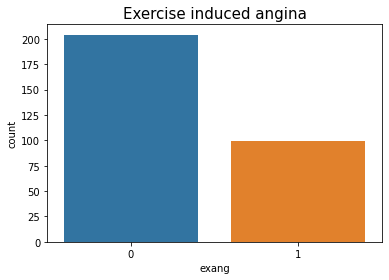

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(df['exang'])
plt.title('Exercise induced angina', fontsize = 15)
plt.xticks(rotation= 0)
plt.show()

In [ ]:
Exang: Exang: exercise induced angina (1 = yes; 0 = no)

In [80]:
exang_count = pd.DataFrame(df['exang'].value_counts())
exang_count

,exang
0,204
1,99


In [81]:
exang_percent = pd.DataFrame(df['exang'].value_counts(normalize=True)*100)
exang_percent

,exang
0,67.326733
1,32.673267


In [ ]:
67.33% of the angina was not induced by exercise


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


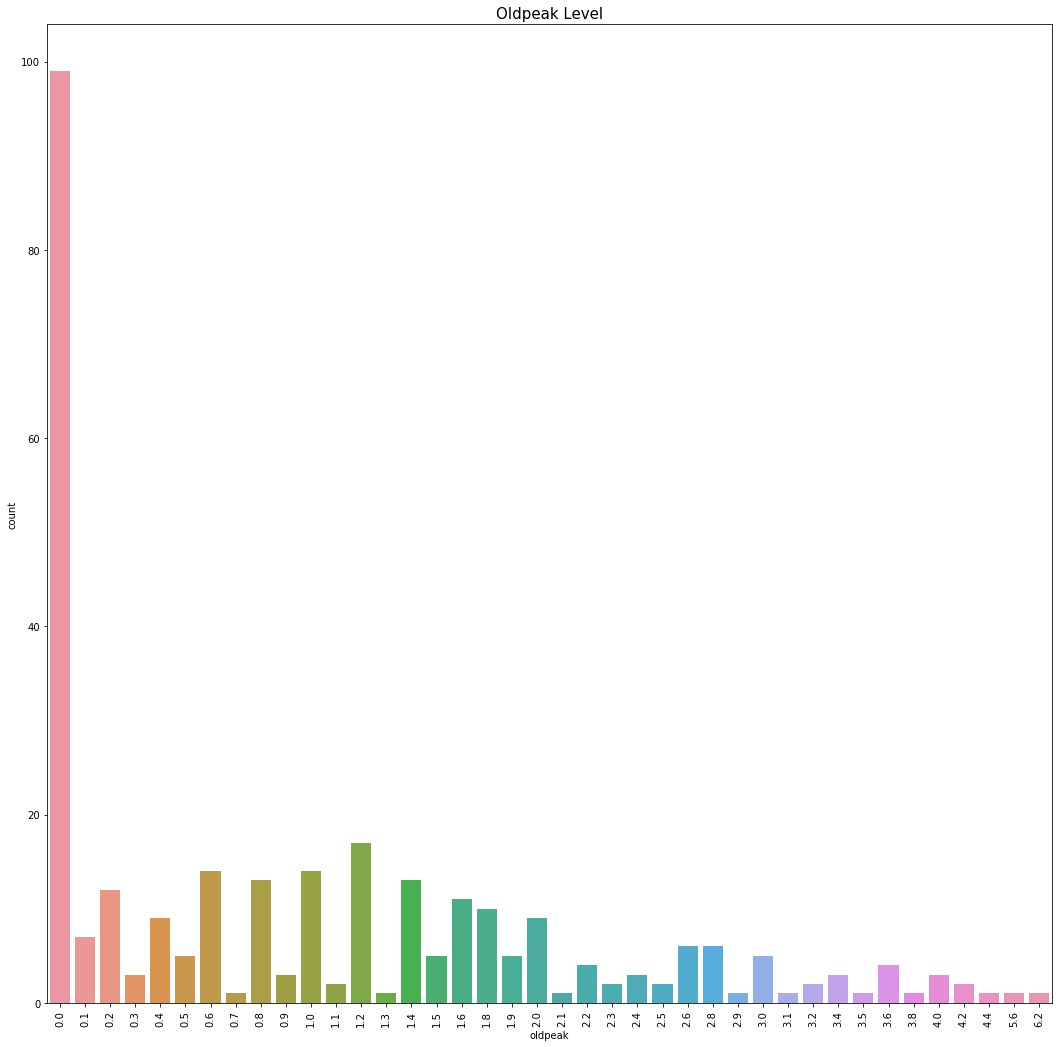

In [82]:
plt.figure(figsize=(18,18))
sns.countplot(df['oldpeak'])
plt.title('Oldpeak Level', fontsize = 15)
plt.xticks(rotation= 90)
plt.show()

In [ ]:
Oldpeak = ST depression induced by exercise relative to rest

In [83]:
oldpeak_count = pd.DataFrame(df['oldpeak'].value_counts(bins=10))
oldpeak_count

,oldpeak
"(-0.0072, 0.62]",149
"(0.62, 1.24]",50
"(1.24, 1.86]",40
"(1.86, 2.48]",24
"(2.48, 3.1]",21
"(3.1, 3.72]",10
"(3.72, 4.34]",6
"(5.58, 6.2]",2
"(4.34, 4.96]",1
"(4.96, 5.58]",0


In [ ]:
oldpeak_percent = pd.DataFrame(df['oldpeak'].value_counts(normalize=True)*100)
oldpeak_percent

In [ ]:
0.0 has the highest percent of oldpeak with a value of 32.67%

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


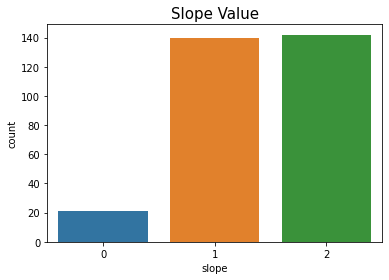

In [84]:
plt.figure(figsize=(6,4))
sns.countplot(df['slope'])
plt.title('Slope Value', fontsize = 15)
plt.xticks(rotation= 0)
plt.show()

In [ ]:
Slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

In [85]:
slope_count = pd.DataFrame(df['slope'].value_counts())
slope_count

,slope
2,142
1,140
0,21


In [86]:
slope_percent = pd.DataFrame(df['slope'].value_counts(normalize=True)*100)
slope_percent

,slope
2,46.864686
1,46.204620
0,6.930693


In [ ]:
Downsloping and flat account for the majority of the slope of the peak exercise ST segment with only a marginal difference of 0.60 between them.
Upsloping account for the least slope type.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


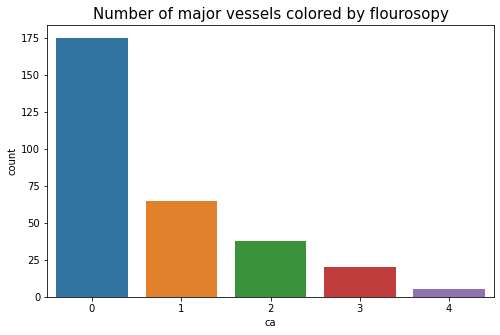

In [87]:
plt.figure(figsize=(8,5))
sns.countplot(df['ca'])
plt.title('Number of major vessels colored by flourosopy', fontsize = 15)
plt.xticks(rotation= 0)
plt.show()

In [ ]:
ca: number of major vessels (0-3) colored by flourosopy

In [88]:
ca_count = pd.DataFrame(df['ca'].value_counts())
ca_count

,ca
0,175
1,65
2,38
3,20
4,5


In [89]:
ca_percent = pd.DataFrame(df['ca'].value_counts(normalize=True)*100)
ca_percent

,ca
0,57.755776
1,21.452145
2,12.541254
3,6.600660
4,1.650165


In [ ]:
57.76% showed zero organ colored by flourosopy while 21.45% had 1 organ colored by flourosopy

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


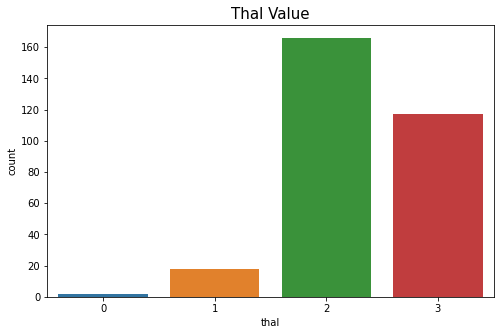

In [90]:
plt.figure(figsize=(8,5))
sns.countplot(df['thal'])
plt.title('Thal Value', fontsize = 15)
plt.xticks(rotation= 0)
plt.show()

In [ ]:
Thal: 3 = normal; 2 = fixed defect; 1 = reversable defect

In [91]:
thal_count = pd.DataFrame(df['thal'].value_counts())
thal_count

,thal
2,166
3,117
1,18
0,2


In [92]:
thal_count = pd.DataFrame(df['thal'].value_counts(normalize=True)*100)
thal_count

,thal
2,54.785479
3,38.613861
1,5.940594
0,0.660066


In [93]:
pd.DataFrame(df.groupby('thal')['sex'].value_counts())

sex
thal sex     
0    0      1
     1      1
1    1     17
     0      1
2    1     87
     0     79
3    1    102
     0     15

In [94]:
pd.DataFrame(df.groupby('thal')['sex'].value_counts(normalize=True)*100)

sex
thal sex           
0    0    50.000000
     1    50.000000
1    1    94.444444
     0     5.555556
2    1    52.409639
     0    47.590361
3    1    87.179487
     0    12.820513

In [95]:
pd.DataFrame(df.groupby('thal')['fbs'].value_counts())

fbs
thal fbs     
0    0      1
     1      1
1    0     13
     1      5
2    0    146
     1     20
3    0     98
     1     19

In [96]:
pd.DataFrame(df.groupby('thal')['fbs'].value_counts(normalize=True)*100)

fbs
thal fbs           
0    0    50.000000
     1    50.000000
1    0    72.222222
     1    27.777778
2    0    87.951807
     1    12.048193
3    0    83.760684
     1    16.239316

In [97]:
pd.DataFrame(df.groupby('thal')['exang'].value_counts(normalize=True)*100)

exang
thal exang           
0    0      50.000000
     1      50.000000
1    0      55.555556
     1      44.444444
2    0      81.325301
     1      18.674699
3    1      50.427350
     0      49.572650

In [ ]:
54.79% have their thal fixed defect while 38.61% have their thal as normal
87.18% of patients with thal as normal were males while females account for 12.82%
83.76% of thal as normal had over 120mg/dl concentration of fasting blood sugar likewise 87.95% account for the percentge of patients with thal as fixed defected

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


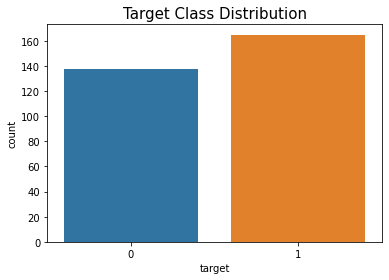

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(df['target'])
plt.title('Target Class Distribution', fontsize = 15)
plt.xticks(rotation= 0)
plt.show()

In [ ]:
Target: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [99]:
target_count = pd.DataFrame(df['target'].value_counts())
target_count

,target
1,165
0,138


In [100]:
target_count = pd.DataFrame(df['target'].value_counts(normalize=True)*100)
target_count

,target
1,54.455446
0,45.544554


In [ ]:
54.46% of the patients dignosed had an above 50% of their diameter narrowing hence leading to heart disease

# BIVARIATE ANALYSIS

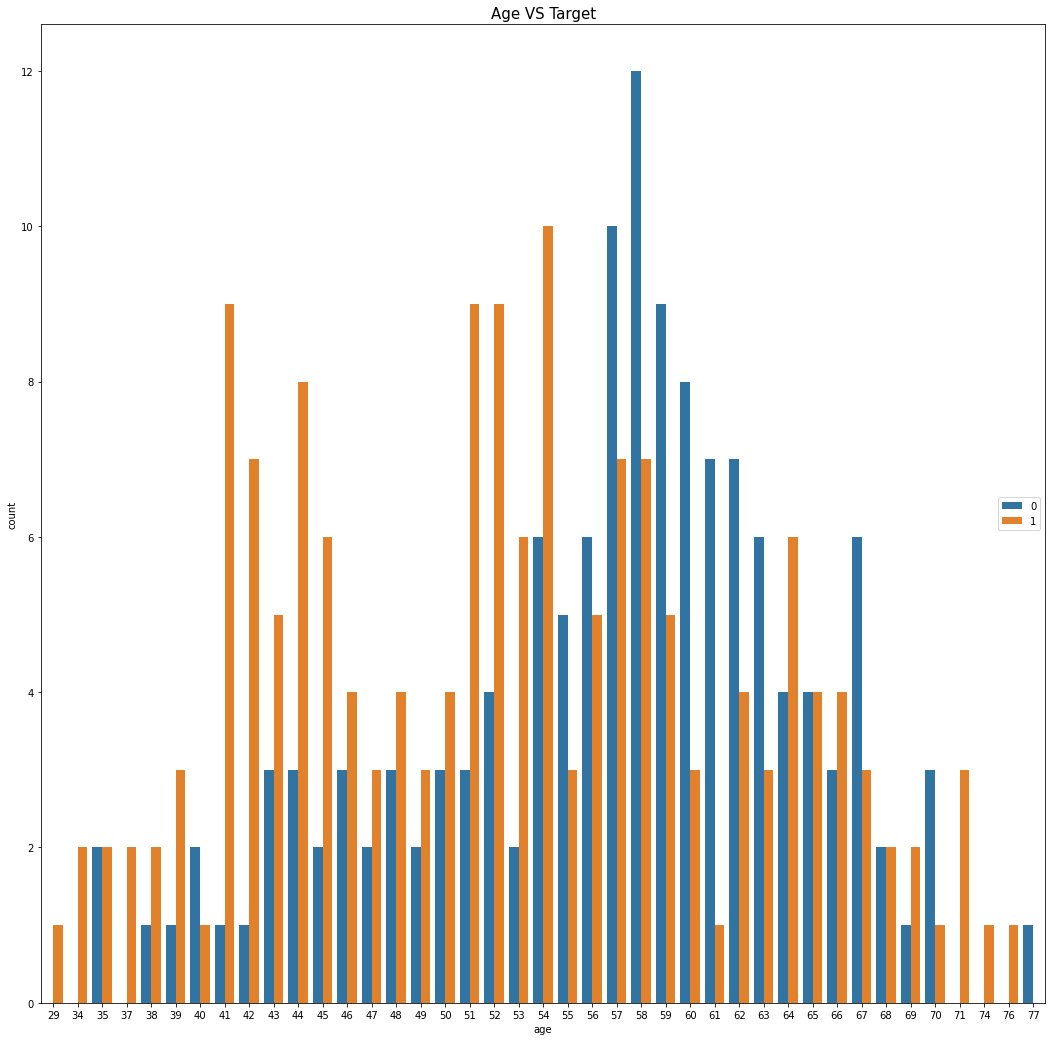

In [101]:
plt.figure(figsize=(18,18))
sns.countplot(x='age', hue='target', data=df)
plt.legend(loc='right')
plt.title('Age VS Target', fontsize = 15)
plt.show()

In [107]:
A = pd.DataFrame(df.groupby('age')['target'].value_counts())
A.iloc[:40,:]

target
age target        
29  1            1
34  1            2
35  0            2
    1            2
37  1            2
38  1            2
    0            1
39  1            3
    0            1
40  0            2
    1            1
41  1            9
    0            1
42  1            7
    0            1
43  1            5
    0            3
44  1            8
    0            3
45  1            6
    0            2
46  1            4
    0            3
47  1            3
    0            2
48  1            4
    0            3
49  1            3
    0            2
50  1            4
    0            3
51  1            9
    0            3
52  1            9
    0            4
53  1            6
    0            2
54  1           10
    0            6
55  0            5

In [ ]:
Age: age in years
Target: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

Ages between 39 and 54 are more predisposed to having heart disease as can be seen from the lenght of the orange bars and their cluster in that age bracket

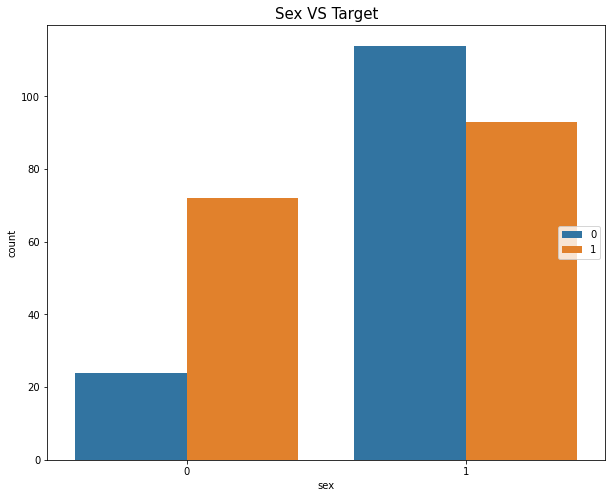

In [108]:
plt.figure(figsize=(10,8))
sns.countplot(x='sex', hue='target', data=df)
plt.legend(loc='right')
plt.title('Sex VS Target', fontsize = 15)
plt.show()

In [109]:
pd.DataFrame(df.groupby('sex')['target'].value_counts())

target
sex target        
0   1           72
    0           24
1   0          114
    1           93

In [110]:
pd.DataFrame(df.groupby('sex')['target'].value_counts(normalize=True)*100)

target
sex target           
0   1       75.000000
    0       25.000000
1   0       55.072464
    1       44.927536

In [ ]:
Sex: sex (1 = male; 0 = female)
Target: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
    
Females are more likely to have heart disease as 75% of female diagnosed had 50% diameter narrowing which in turn leads to heart disease while only about 44.93% of males had heart disease

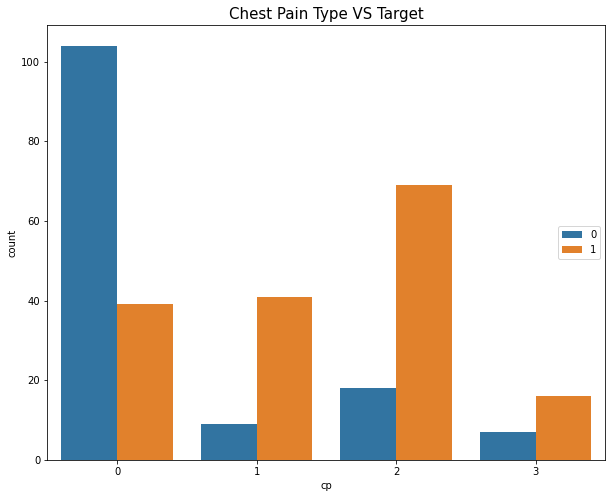

In [111]:
plt.figure(figsize=(10,8))
sns.countplot(x='cp', hue='target', data=df)
plt.legend(loc='right')
plt.title('Chest Pain Type VS Target', fontsize = 15)
plt.show()

In [112]:
pd.DataFrame(df.groupby('cp')['target'].value_counts())

target
cp target        
0  0          104
   1           39
1  1           41
   0            9
2  1           69
   0           18
3  1           16
   0            7

In [113]:
pd.DataFrame(df.groupby('cp')['target'].value_counts(normalize=True)*100)

target
cp target           
0  0       72.727273
   1       27.272727
1  1       82.000000
   0       18.000000
2  1       79.310345
   0       20.689655
3  1       69.565217
   0       30.434783

In [ ]:
cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
    
atypical angina pain(24.85%) and non-anginal pain(41.82%) account for over 66.67% of heart disease amongst the patients diagnosed
while 23.64& of heart disease is caused from typical angina pain.

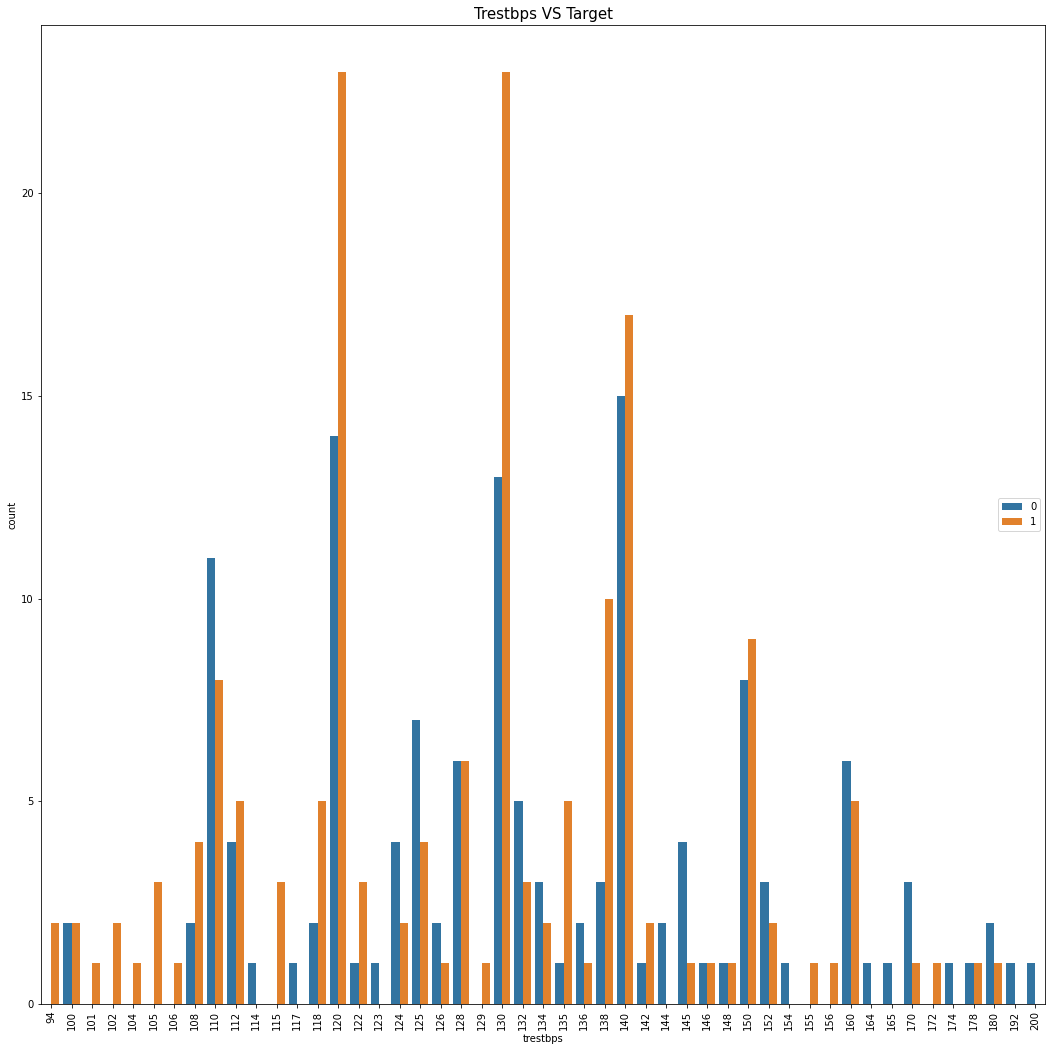

In [114]:
plt.figure(figsize=(18,18))
sns.countplot(x='trestbps', hue='target', data=df)
plt.legend(loc='right')
plt.xticks(rotation= 90)
plt.title('Trestbps VS Target', fontsize = 15)
plt.show()

In [115]:
pd.DataFrame(df.groupby('trestbps')['target'].value_counts())

target
trestbps target        
94       1            2
100      0            2
         1            2
101      1            1
102      1            2
...                 ...
178      1            1
180      0            2
         1            1
192      0            1
200      0            1

[77 rows x 1 columns]

In [116]:
pd.DataFrame(df.groupby('trestbps')['target'].value_counts(normalize=True)*100)

target
trestbps target            
94       1       100.000000
100      0        50.000000
         1        50.000000
101      1       100.000000
102      1       100.000000
...                     ...
178      1        50.000000
180      0        66.666667
         1        33.333333
192      0       100.000000
200      0       100.000000

[77 rows x 1 columns]

In [ ]:
Trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    
resting blood pressure of 120mmHg to 140mmHg has a higher tendency of having a heart disease

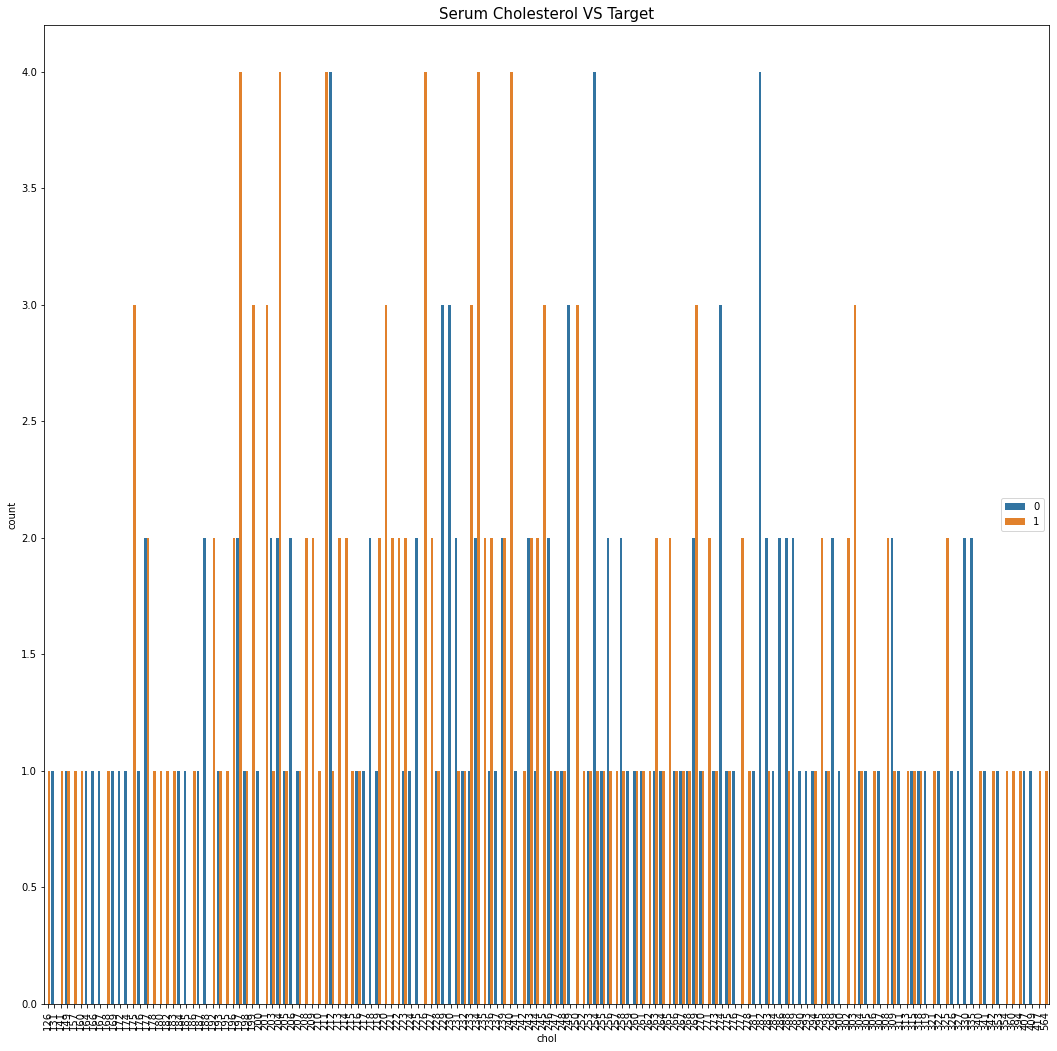

In [117]:
plt.figure(figsize=(18,18))
sns.countplot(x='chol', hue='target', data=df)
plt.legend(loc='right')
plt.xticks(rotation= 90)
plt.title('Serum Cholesterol VS Target', fontsize = 15)
plt.show()

In [118]:
pd.DataFrame(df.groupby('chol')['target'].value_counts())

target
chol target        
126  1            1
131  0            1
141  1            1
149  0            1
     1            1
...             ...
394  1            1
407  0            1
409  0            1
417  1            1
564  1            1

[201 rows x 1 columns]

In [ ]:
Chol: serum cholestoral in mg/dl
    
serum cholesterol concentration between 192-242mg/dl has recorded more heart disease

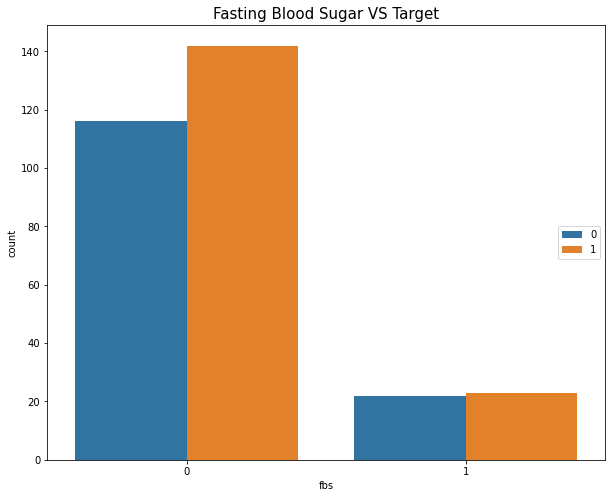

In [119]:
plt.figure(figsize=(10,8))
sns.countplot(x='fbs', hue='target', data=df)
plt.legend(loc='right')
plt.title('Fasting Blood Sugar VS Target', fontsize = 15)
plt.show()

In [120]:
pd.DataFrame(df.groupby('fbs')['target'].value_counts())

target
fbs target        
0   1          142
    0          116
1   1           23
    0           22

In [121]:
pd.DataFrame(df.groupby('fbs')['target'].value_counts(normalize=True)*100)

target
fbs target           
0   1       55.038760
    0       44.961240
1   1       51.111111
    0       48.888889

In [ ]:
Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
    No_of_fbs_heart_disease= 142
    No_of_heart_disease = 165
    Percentage_fbs_heart_disease = (142/165)*100 = 86.06%

Fasting blood sugar less than 120mg/dl has 86.06% of the diagnosed patients having 50% diameter narrowing

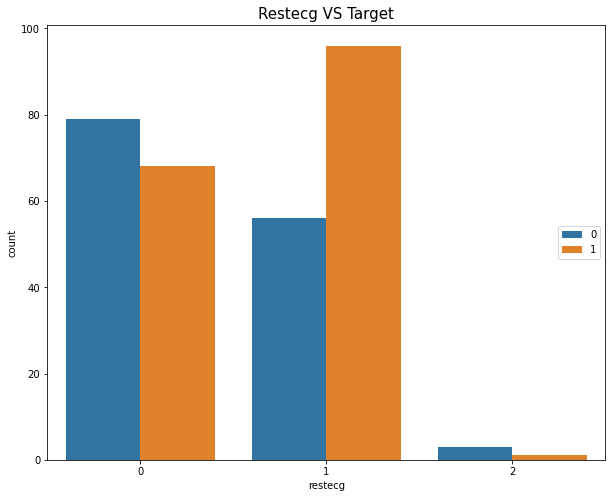

In [122]:
plt.figure(figsize=(10,8))
sns.countplot(x='restecg', hue='target', data=df)
plt.legend(loc='right')
plt.title('Restecg VS Target', fontsize = 15)
plt.show()

In [123]:
pd.DataFrame(df.groupby('restecg')['target'].value_counts())

target
restecg target        
0       0           79
        1           68
1       1           96
        0           56
2       0            3
        1            1

In [124]:
pd.DataFrame(df.groupby('restecg')['target'].value_counts(normalize=True)*100)

target
restecg target           
0       0       53.741497
        1       46.258503
1       1       63.157895
        0       36.842105
2       0       75.000000
        1       25.000000

In [ ]:
Restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
96 of the 165 diagnosed heart disease cases had a restecg value of 1 accounting for 58.18%

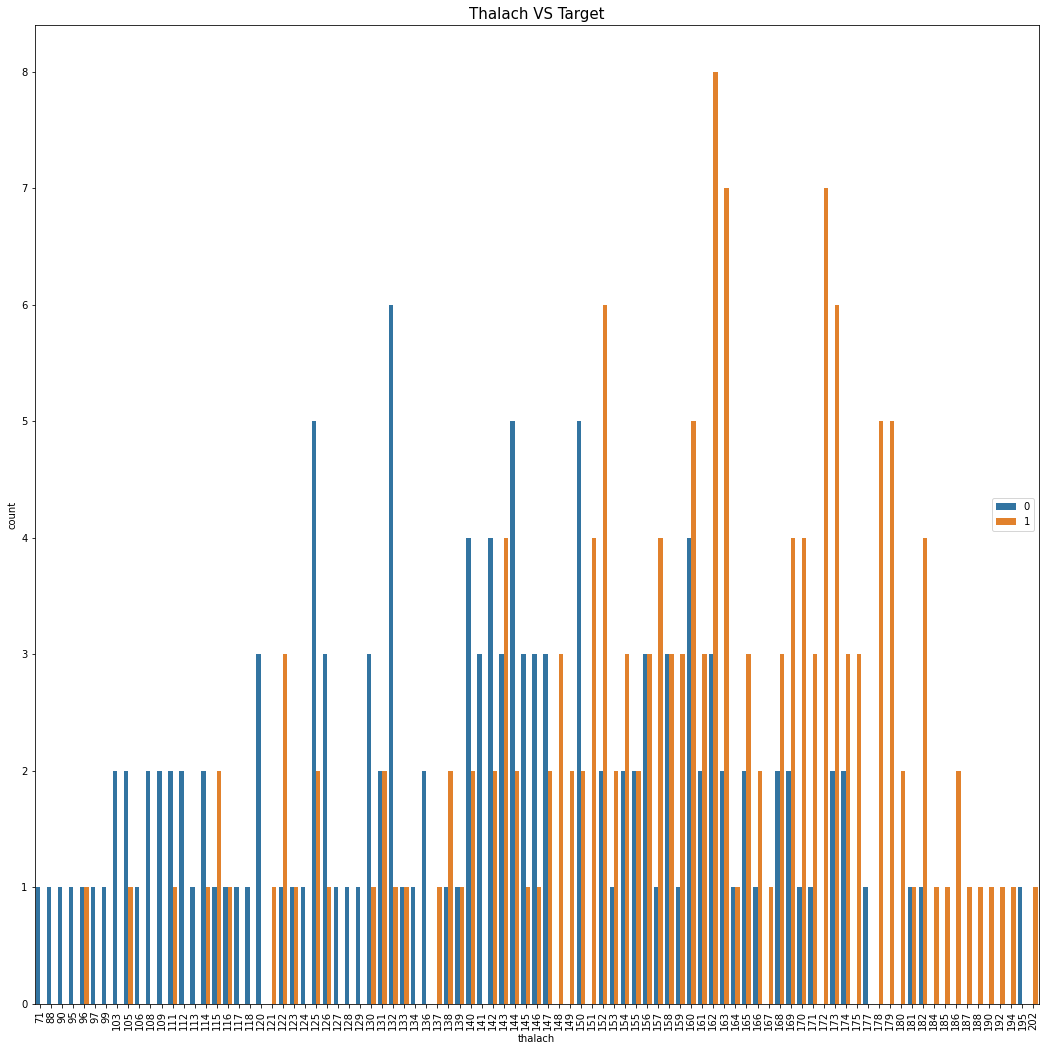

In [125]:
plt.figure(figsize=(18,18))
sns.countplot(x='thalach', hue='target', data=df)
plt.legend(loc='right')
plt.xticks(rotation= 90)
plt.title('Thalach VS Target', fontsize = 15)
plt.show()

In [126]:
A = pd.DataFrame(df.groupby('thalach')['target'].value_counts())
A.iloc[75:130,:]

target
thalach target        
152     1            6
        0            2
153     1            2
        0            1
154     1            3
        0            2
155     0            2
        1            2
156     0            3
        1            3
157     1            4
        0            1
158     0            3
        1            3
159     1            3
        0            1
160     1            5
        0            4
161     1            3
        0            2
162     1            8
        0            3
163     1            7
        0            2
164     0            1
        1            1
165     1            3
        0            2
166     1            2
        0            1
167     1            1
168     1            3
        0            2
169     1            4
        0            2
170     1            4
        0            1
171     1            3
        0            1
172     1            7
173     1            6
        0            2
174     1            3
        0            2
175     1            3
177     0            1
178     1            5
179     1            5
180     1            2
181     0            1
        1            1
182     1            4
        0            1
184     1            1
185     1            1

In [ ]:
Thalach: maximum heart rate achieved
    
Maximum heart rate between 151-182 has accounted for more cases with heart disease while 162 been the highest with 8 cases recorded

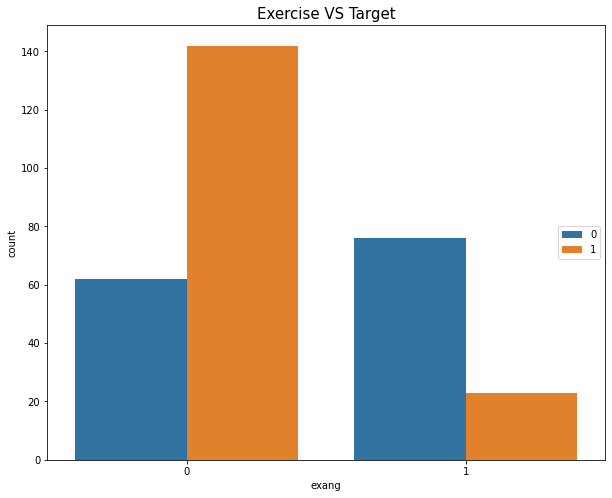

In [127]:
plt.figure(figsize=(10,8))
sns.countplot(x='exang', hue='target', data=df)
plt.legend(loc='right')
plt.title('Exercise VS Target', fontsize = 15)
plt.show()

In [ ]:
pd.DataFrame(df.groupby('exang')['target'].value_counts())

In [ ]:
pd.DataFrame(df.groupby('exang')['target'].value_counts(normalize=True)*100)

In [ ]:
Exang: exercise induced angina (1 = yes; 0 = no)
    
23 out of the 165 heart disease had angina pain caused by exercise, angina pain not induced by exercise had 142 with about 86.06% leading to 50% diameter narrowing

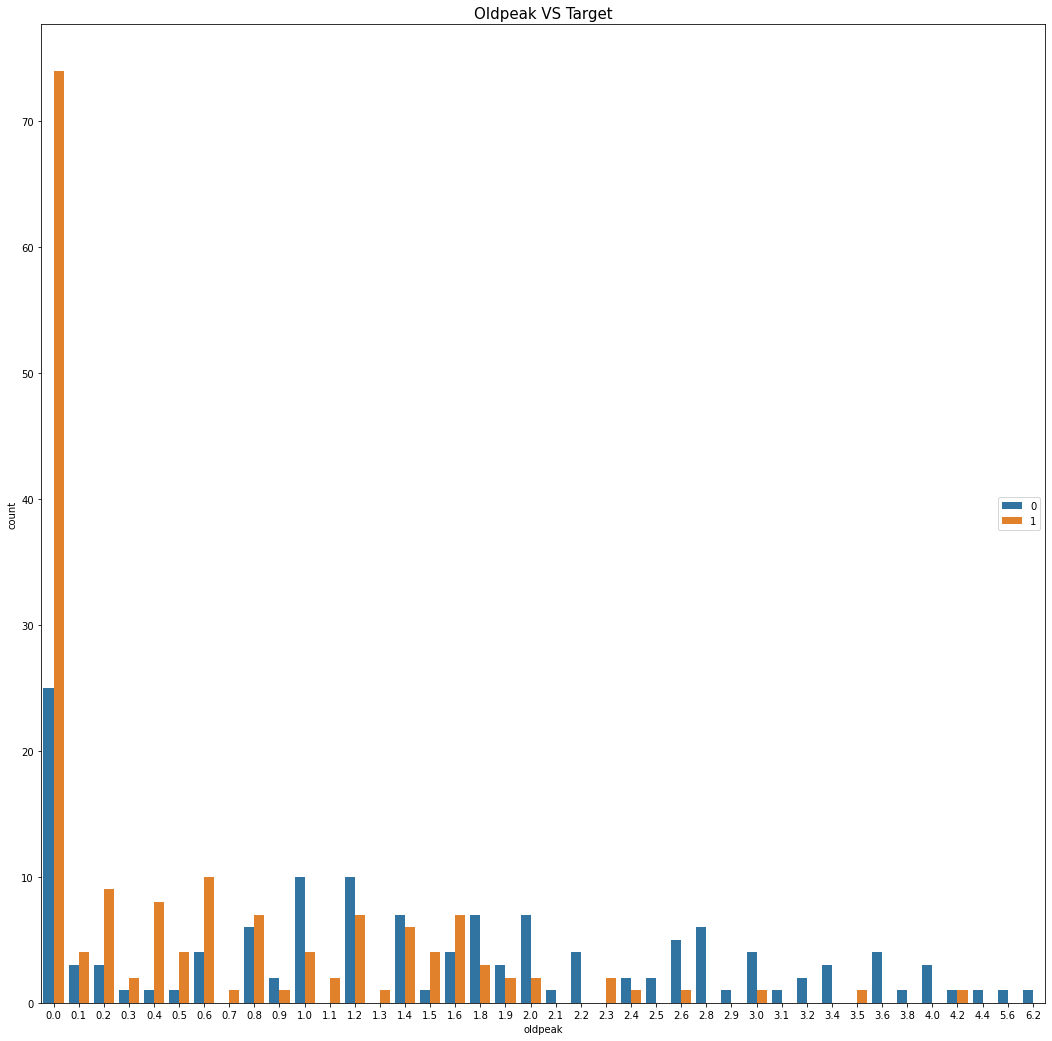

In [128]:
plt.figure(figsize=(18,18))
sns.countplot(x='oldpeak', hue='target', data=df)
plt.legend(loc='right')
plt.title('Oldpeak VS Target', fontsize = 15)
plt.show()

In [129]:
pd.DataFrame(df.groupby('oldpeak')['target'].value_counts())

target
oldpeak target        
0.0     1           74
        0           25
0.1     1            4
        0            3
0.2     1            9
...                ...
4.2     0            1
        1            1
4.4     0            1
5.6     0            1
6.2     0            1

[61 rows x 1 columns]

In [ ]:
Oldpeak = ST depression induced by exercise relative to rest
oldpeak value of 0.0 had 44.85% of all the heart disease diagnosed

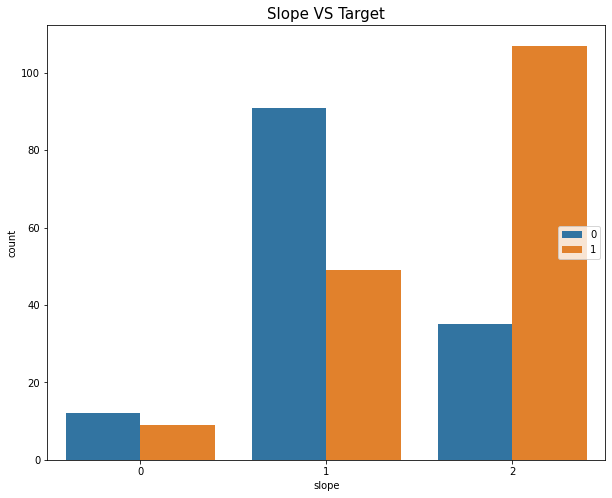

In [130]:
plt.figure(figsize=(10,8))
sns.countplot(x='slope', hue='target', data=df)
plt.legend(loc='right')
plt.title('Slope VS Target', fontsize = 15)
plt.show()

In [131]:
pd.DataFrame(df.groupby('slope')['target'].value_counts())

target
slope target        
0     0           12
      1            9
1     0           91
      1           49
2     1          107
      0           35

In [132]:
pd.DataFrame(df.groupby('slope')['target'].value_counts(normalize=True)*100)

target
slope target           
0     0       57.142857
      1       42.857143
1     0       65.000000
      1       35.000000
2     1       75.352113
      0       24.647887

In [ ]:
Slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
    
As slope value increases from 1 to 3 so also is the probabiity of percentage of been diagnosed with heart disease increasing

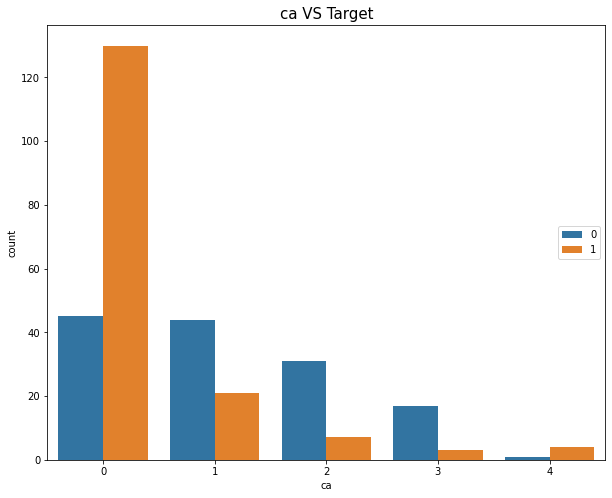

In [133]:
plt.figure(figsize=(10,8))
sns.countplot(x='ca', hue='target', data=df)
plt.legend(loc='right')
plt.title('ca VS Target', fontsize = 15)
plt.show()

In [134]:
pd.DataFrame(df.groupby('ca')['target'].value_counts())

target
ca target        
0  1          130
   0           45
1  0           44
   1           21
2  0           31
   1            7
3  0           17
   1            3
4  1            4
   0            1

In [135]:
pd.DataFrame(df.groupby('ca')['target'].value_counts(normalize=True)*100)

target
ca target           
0  1       74.285714
   0       25.714286
1  0       67.692308
   1       32.307692
2  0       81.578947
   1       18.421053
3  0       85.000000
   1       15.000000
4  1       80.000000
   0       20.000000

In [ ]:
ca: number of major vessels (0-3) colored by flourosopy
    
78.79% of the diagnosed heart disease had zero organ colored by the flourosopy

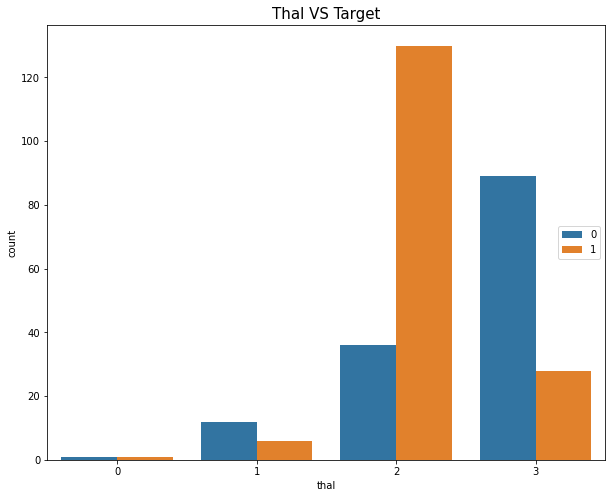

In [136]:
plt.figure(figsize=(10,8))
sns.countplot(x='thal', hue='target', data=df)
plt.legend(loc='right')
plt.title('Thal VS Target', fontsize = 15)
plt.show()

In [137]:
pd.DataFrame(df.groupby('thal')['target'].value_counts())

target
thal target        
0    0            1
     1            1
1    0           12
     1            6
2    1          130
     0           36
3    0           89
     1           28

In [138]:
pd.DataFrame(df.groupby('thal')['target'].value_counts(normalize=True)*100)

target
thal target           
0    0       50.000000
     1       50.000000
1    0       66.666667
     1       33.333333
2    1       78.313253
     0       21.686747
3    0       76.068376
     1       23.931624

In [ ]:
Thal: 3 = normal; 2 = fixed defect; 1 = reversable defect
    
Thal value of 2 had 78.79% of been diagnosed with heart disease caused by 50% diameter narrowing

# Linear Relationship

<Figure size 720x576 with 0 Axes>

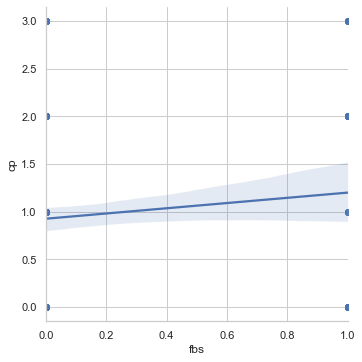

In [139]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax = sns.lmplot(x='fbs', y='cp', data=df)

In [ ]:
df.columns

<Figure size 720x576 with 0 Axes>

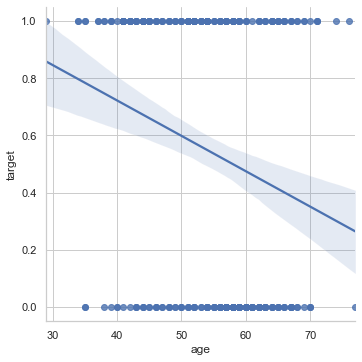

In [140]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax = sns.lmplot(x='age', y='target', data=df)

<Figure size 720x576 with 0 Axes>

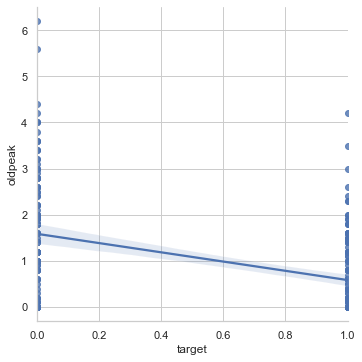

In [141]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax = sns.lmplot(x='target', y='oldpeak', data=df)

# DROPPING ROWS CONTAINING ERROR VALUES

In [149]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [ ]:
but the value range for ca from the description is given as
ca: number of major vessels (0-3) colored by flourosopy
so the rows having 4 as value will be dropped

In [171]:
pd.DataFrame(df.loc[df['ca'] == 4])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [210]:
df.drop([92,158,163,164,251,48,281], axis=0, inplace=True)
df['ca'].unique()

array([0, 2, 1, 3], dtype=int64)

In [211]:
df['thal'].unique()

array([1, 2, 3], dtype=int64)

In [ ]:
but the value range for thal from the description is given as
Thal: 3 = normal; 2 = fixed defect; 1 = reversable defect
so the rows having 0 as value will be dropped

In [165]:
pd.DataFrame(df.loc[df['thal'] == 0])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


# REMOVAL OF OUTLIERS

In [212]:
zscores = np.abs(zscore(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]))
filtered_entries = (zscores < 3.0).all(axis=1)
numerical_entries = df[filtered_entries]

In [213]:
print(df.shape)
print(numerical_entries.shape)

(296, 14)
(287, 14)


In [176]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

# DATA PREPROCESSING AND TRANSFORMATION

In [214]:
predictors_df = numerical_entries.drop(columns='target')
target_df = numerical_entries['target']
predictors_df.shape

(287, 13)

In [182]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_df = pd.DataFrame(scaler.fit_transform(predictors_df), columns= predictors_df.columns)
rescaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,287.0,0.527802,0.189440,0.0,0.375000,0.541667,0.666667,1.0
sex,287.0,0.689895,0.463344,0.0,0.000000,1.000000,1.000000,1.0
cp,287.0,0.324042,0.345791,0.0,0.000000,0.333333,0.666667,1.0
trestbps,287.0,0.430516,0.197580,0.0,0.302326,0.418605,0.534884,1.0
chol,287.0,0.442171,0.171346,0.0,0.317164,0.429104,0.552239,1.0
fbs,287.0,0.142857,0.350538,0.0,0.000000,0.000000,0.000000,1.0
restecg,287.0,0.266551,0.263508,0.0,0.000000,0.500000,0.500000,1.0
thalach,287.0,0.542148,0.197812,0.0,0.399123,0.570175,0.684211,1.0
exang,287.0,0.327526,0.470131,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,287.0,0.228381,0.245610,0.0,0.000000,0.181818,0.363636,1.0


In [215]:
scaler = Normalizer()
normalized_df = pd.DataFrame(scaler.fit_transform(rescaled_df), columns= rescaled_df.columns)
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,287.0,0.270514,0.099318,0.0,0.206053,0.272818,0.335587,0.651396
sex,287.0,0.334506,0.229096,0.0,0.000000,0.446224,0.507177,0.684801
cp,287.0,0.166952,0.175584,0.0,0.000000,0.160902,0.328496,0.571791
trestbps,287.0,0.218620,0.094087,0.0,0.154514,0.211641,0.282627,0.500867
chol,287.0,0.227741,0.091971,0.0,0.163772,0.215455,0.278688,0.608639
fbs,287.0,0.063647,0.156910,0.0,0.000000,0.000000,0.000000,0.534865
restecg,287.0,0.138120,0.139423,0.0,0.000000,0.200711,0.256765,0.543741
thalach,287.0,0.283170,0.116098,0.0,0.196762,0.282944,0.367752,0.592173
exang,287.0,0.154512,0.224240,0.0,0.000000,0.000000,0.431306,0.651140
oldpeak,287.0,0.113312,0.117658,0.0,0.000000,0.088636,0.192382,0.488760


# TREATING IMBALANCE

In [216]:
x_train, x_test, y_train, y_test = train_test_split(normalized_df,target_df, test_size=0.3, random_state=42)

In [217]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [218]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_smote, y_train_smote)
y_pred = clf.predict(x_test)

In [219]:
print('RF Train Score is : ' , clf.score(x_train_smote, y_train_smote))
print('RF Test Score is : ' , clf.score(x_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print('RF Model accuracy is: ', accuracy)

RF Train Score is :  1.0
RF Test Score is :  0.8160919540229885
RF Model accuracy is:  0.8160919540229885


In [220]:
lR = LogisticRegression()
lR.fit(x_train_smote, y_train_smote)
y_pred = clf.predict(x_test)

In [221]:
print('LR Train Score is : ' , lR.score(x_train_smote, y_train_smote))
print('LR Test Score is : ' , lR.score(x_test, y_test))
accuracy2 = accuracy_score(y_test, y_pred)
print('LR Model accuracy is: ', accuracy2)

LR Train Score is :  0.8380952380952381
LR Test Score is :  0.896551724137931
LR Model accuracy is:  0.8160919540229885


In [222]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test.values,y_pred)
print(cm)

[[30  4]
 [12 41]]


In [223]:
cr =classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        34
           1       0.91      0.77      0.84        53

    accuracy                           0.82        87
   macro avg       0.81      0.83      0.81        87
weighted avg       0.83      0.82      0.82        87



In [224]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(normalized_df, target_df)

In [225]:
RF = RandomForestClassifier(random_state=42)
kfold = KFold(n_splits=3, shuffle=True, random_state=7)
results = cross_val_score(RF, x_smote, y_smote, cv=kfold)

In [226]:
results = cross_val_score(RF, x_smote, y_smote, cv=kfold)
print('The RF accuracy score is: ',(results*100))
print('The standard deviation score is:',(results.std()*100))

The RF accuracy score is:  [87.73584906 80.95238095 87.61904762]
The standard deviation score is: 3.1705857597833385
